In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
csv_file_path = "./dataset/all/IHME-GDB-Deaths.csv"
df = pd.read_csv(csv_file_path)

In [114]:
df[df.age=="All Ages"]

,Unnamed: 0,measure,location,sex,age,cause,metric,year,val,upper,lower


In [112]:
df.to_csv(csv_file_path)

In [115]:
df.head()

,Unnamed: 0,measure,location,sex,age,cause,metric,year,val,upper,lower
0,0,Deaths,Gabon,Both,80 to 84,Other neoplasms,Number,2016,0.592619,0.859968,0.357246
1,1,Deaths,Gabon,Male,85 plus,Other neoplasms,Number,2016,0.209733,0.344426,0.114420
2,2,Deaths,Gabon,Female,85 plus,Other neoplasms,Number,2016,0.243306,0.428627,0.103305
3,3,Deaths,Gabon,Both,85 plus,Other neoplasms,Number,2016,0.453039,0.659978,0.266404
4,4,Deaths,Gabon,Male,1 to 4,Cardiovascular diseases,Number,2016,1.307133,2.660127,0.520400


In [116]:
china = df[(df.location=="China") & (df.sex=="Both")].groupby(['location', 'age']).agg(
    {'val': 'sum',
    'upper': 'sum',
    'lower': 'sum'}
).sort_values(by='age', key=lambda x: x.str.split(' ', expand=True)[0].astype('int'))

In [117]:
china

val         upper         lower
location age                                               
China    1 to 4    1.048115e+06  1.281069e+06  8.461224e+05
         5 to 9    4.497182e+05  5.189241e+05  3.850579e+05
         10 to 14  3.679515e+05  4.181890e+05  3.185482e+05
         15 to 19  5.551046e+05  6.341261e+05  4.781182e+05
         20 to 24  7.295456e+05  8.358988e+05  6.264521e+05
         25 to 29  9.607734e+05  1.099378e+06  8.307073e+05
         30 to 34  1.526271e+06  1.733092e+06  1.333330e+06
         35 to 39  2.526001e+06  2.867091e+06  2.219241e+06
         40 to 44  4.501551e+06  5.107181e+06  3.930127e+06
         45 to 49  6.672671e+06  7.631460e+06  5.758433e+06
         50 to 54  1.009111e+07  1.156486e+07  8.690079e+06
         55 to 59  1.391276e+07  1.598019e+07  1.194103e+07
         60 to 64  2.021282e+07  2.317363e+07  1.740669e+07
         65 to 69  2.693043e+07  3.075815e+07  2.335570e+07
         70 to 74  3.690971e+07  4.196404e+07  3.226957e+07
         75 to 79  4.103600e+07  4.676562e+07  3.606633e+07
         80 to 84  3.987866e+07  4.635394e+07  3.440621e+07
         85 plus   3.677826e+07  4.376322e+07  3.065124e+07

In [140]:
x_axis_label = [i[1].replace(' to ', '-') for i in china.index]
print(x_axis_label)

['1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 plus']


Text(0.5, 0, 'Age')

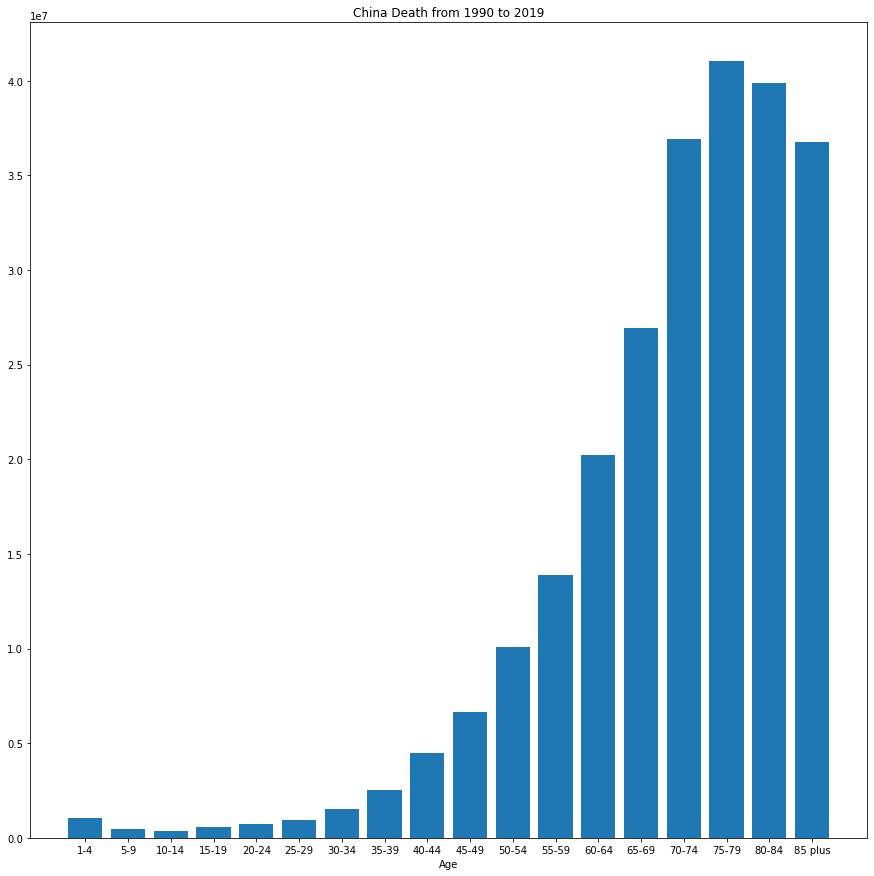

In [145]:
# plot for one country
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(x=x_axis_label, height=china.val.values)
ax.set_title("China Death from 1990 to 2019")
ax.set_xlabel("Age")

In [120]:
age_death_rate = df[df.sex=="Both"].groupby(['age']).agg(
    {'val': 'sum',
    'upper': 'sum',
    'lower': 'sum'}
).sort_values(by='age', key=lambda x: x.str.split(' ', expand=True)[0].astype('int'))

In [121]:
age_death_rate

,val,upper,lower
age,,,
1 to 4,1.933874e+07,3.205634e+07,9.885945e+06
5 to 9,5.961514e+06,7.886582e+06,4.494648e+06
10 to 14,4.840440e+06,6.081593e+06,3.863349e+06
15 to 19,6.696293e+06,8.087553e+06,5.567580e+06
20 to 24,8.294902e+06,9.810588e+06,7.011984e+06
25 to 29,1.010276e+07,1.177444e+07,8.662754e+06
30 to 34,1.458002e+07,1.666662e+07,1.273829e+07
35 to 39,2.204464e+07,2.495255e+07,1.952333e+07
40 to 44,3.570944e+07,4.008026e+07,3.184056e+07


<BarContainer object of 18 artists>

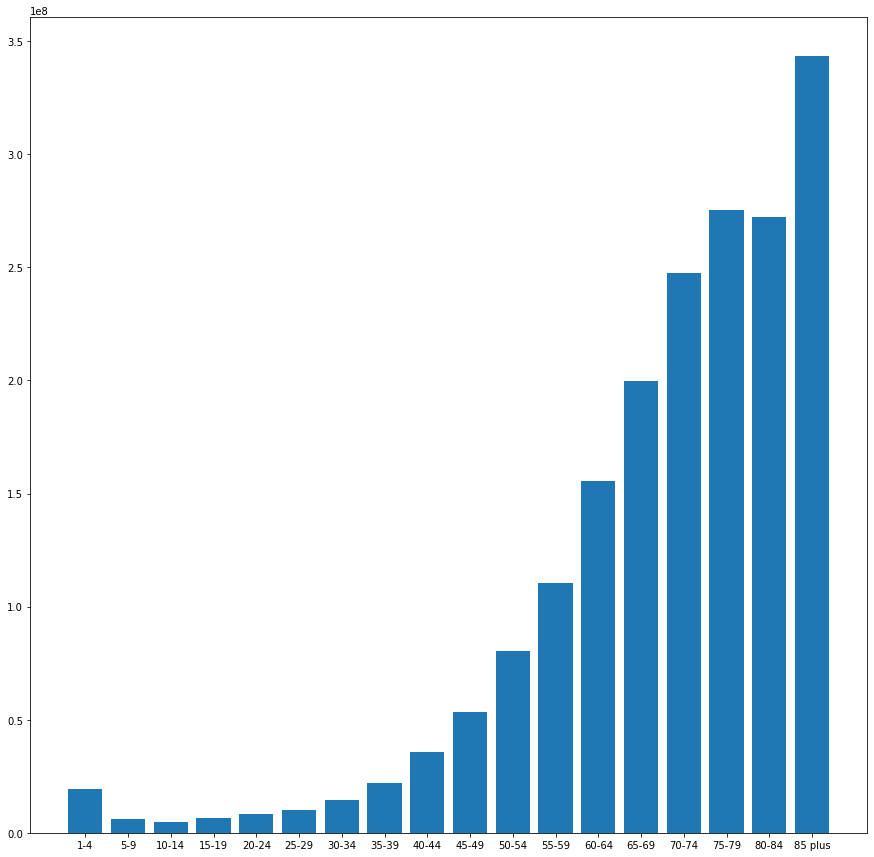

In [122]:
fig, ax = plt.subplots(figsize=(15, 15))
x_axis_label = [i[1].replace(' to ', '-') for i in china.index]
ax.bar(x=x_axis_label, height=age_death_rate.val.values)

In [123]:
each_year = df[df.sex=="Both"].groupby(['age', 'year']).agg(
    {'val': 'sum',
    'upper': 'sum',
    'lower': 'sum'}
).sort_values(by='age', key=lambda x: x.str.split(' ', expand=True)[0].astype('int'))

In [124]:
each_year.query("year==2019")

,,val,upper,lower
age,year,,,
1 to 4,2019,4.583264e+05,7.537900e+05,2.533757e+05
5 to 9,2019,1.563788e+05,2.139575e+05,1.159663e+05
10 to 14,2019,1.384298e+05,1.817174e+05,1.064466e+05
15 to 19,2019,1.976377e+05,2.532234e+05,1.564634e+05
20 to 24,2019,2.618131e+05,3.279705e+05,2.108741e+05
25 to 29,2019,3.247473e+05,3.972340e+05,2.663753e+05
30 to 34,2019,5.036507e+05,6.014185e+05,4.217645e+05
35 to 39,2019,7.474373e+05,8.877147e+05,6.295070e+05
40 to 44,2019,1.186322e+06,1.403752e+06,1.001309e+06


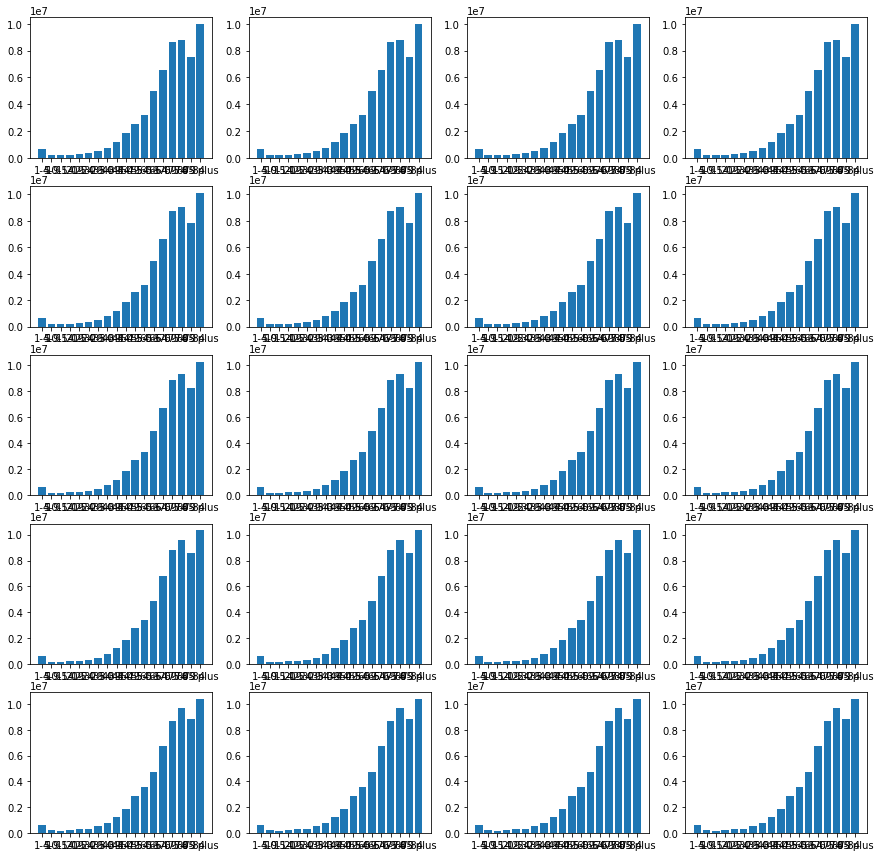

In [138]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        axs[i, j].bar(x=x_axis_label, height=each_year.query(f"year==20{i:02d}").val.values)
# axs[1].bar(x=x_axis_label, height=each_year.query("year==2019").val.values)
plt.show()

2001
